{'名称': 'Make Variant', '长度': 'Length', '地理区域': 'Geographic Region', '国家': 'Country ', '售价': 'Listing Price', '年份': 'Year', '水线长度': 'LWL', '宽度': 'Beam', '吃水': 'Draft', '排水': 'Displacement', '帆面积': 'Sail Area', '类型': 'Hull Type', '平均货物吞吐量': 'AVG Cargo Thro.'}


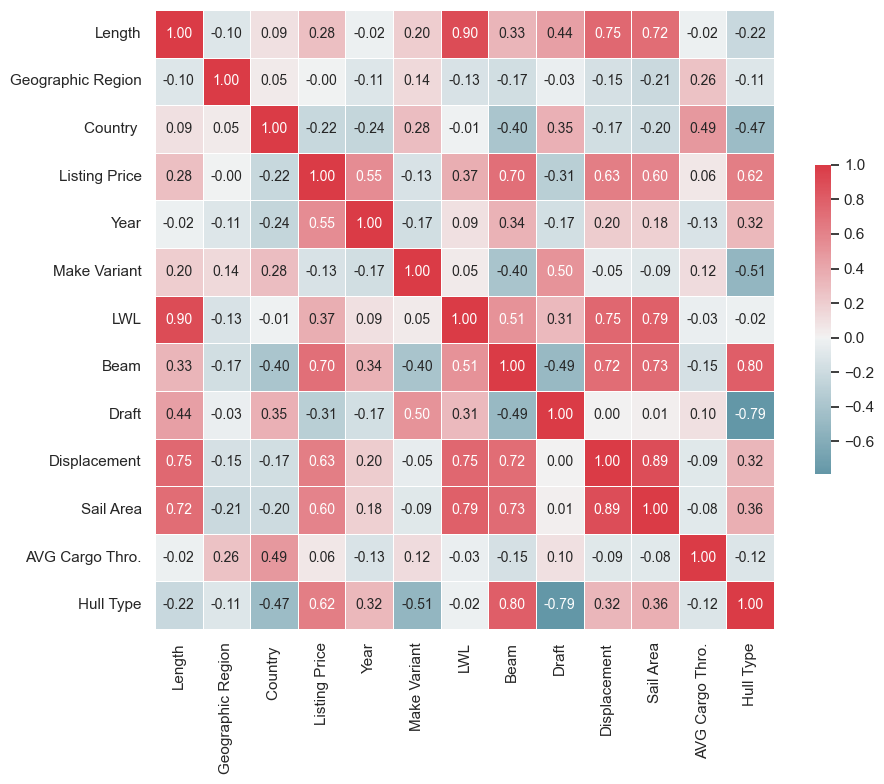

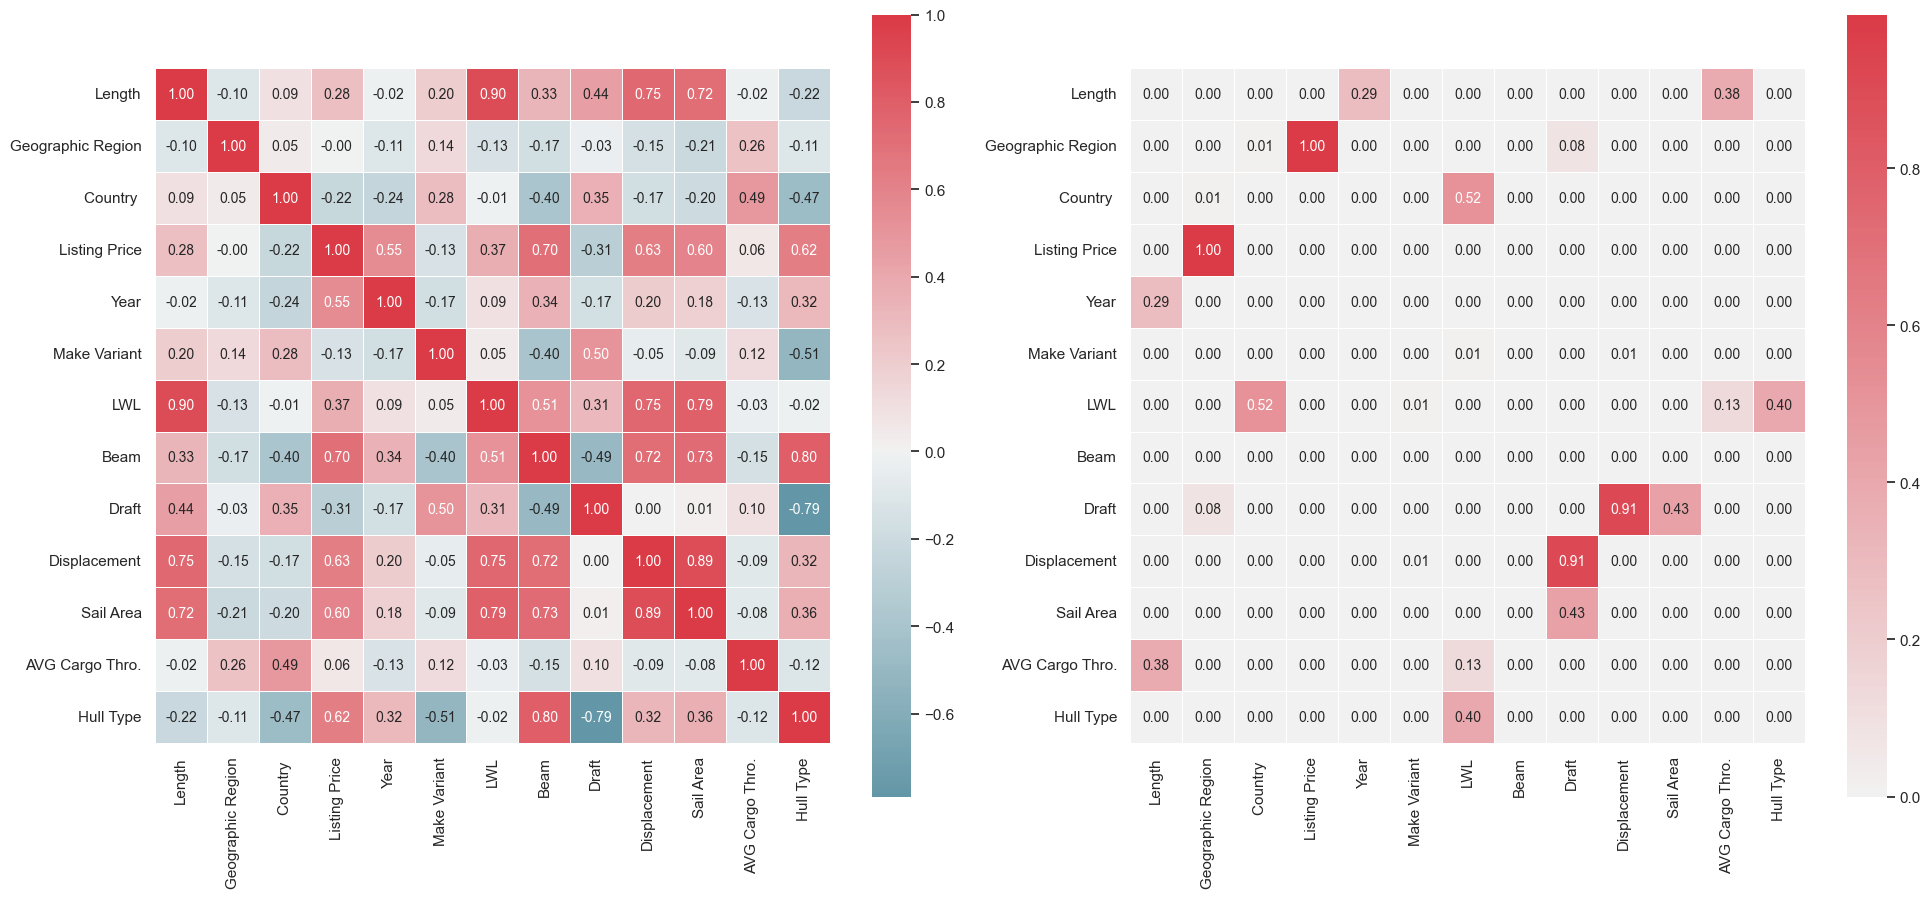

In [25]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

exceptCol = [
    'GDP',
    '人均GDP',
    '物流总成本占GDP的平均比例',
]

columnsDict = {
    'Make Variant': '名称',
    'Length': '长度',
    'Geographic Region': '地理区域',
    'Country ': '国家',
    'Listing Price': '售价',
    'Year': '年份',
    'LWL': '水线长度',
    'Beam': '宽度',
    'Draft': '吃水',
    'Displacement': '排水',
    'Sail Area': '帆面积',
    'Hull Type': '类型',
    'AVG Cargo Thro.': '平均货物吞吐量',
}
print({v: k for k, v in columnsDict.items()})

df = pd.read_excel(r'../数据预处理/xlsx/merged_file.xlsx')
df.drop(columns=exceptCol, inplace=True, axis=1)
df.rename(columns={v: k for k, v in columnsDict.items()}, inplace=True)

# 计算Spearman相关系数及P值
corr_matrix, p_matrix = spearmanr(df)

def twoFig():
    # 绘制热力图（corr_matrix）
    sns.set(style="white")
    fig, axes = plt.subplots(1, 2, figsize=(20, 16)) # 1行2列，figsize指定图像大小
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr_matrix, cmap=cmap, annot=True, annot_kws={"size": 10}, center=0, square=True, linewidths=.5, fmt=".2f",
                cbar_kws={"shrink": .5}, xticklabels=df.columns.values, yticklabels=df.columns.values, ax=axes[0])

    # 绘制热力图（p_matrix）
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(p_matrix, cmap=cmap, annot=True, annot_kws={"size": 10}, center=0, square=True, linewidths=.5, fmt=".2f",
                cbar_kws={"shrink": .5}, xticklabels=df.columns.values, yticklabels=df.columns.values, ax=axes[1])
    plt.tight_layout() # 调整图像布局，防止标签被截断
    plt.savefig('./Spearman-corr-p.svg')
    plt.show()

def oneFig():
    # 绘制热力图（corr_matrix）
    sns.set(style="white")
    fig, axes = plt.subplots(figsize=(10, 8)) # 1行2列，figsize指定图像大小
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr_matrix, cmap=cmap, annot=True, annot_kws={"size": 10}, center=0, square=True, linewidths=.5, fmt=".2f",
                cbar_kws={"shrink": .5}, xticklabels=df.columns.values, yticklabels=df.columns.values)
    plt.tight_layout() # 调整图像布局，防止标签被截断
    plt.savefig('./Spearman-corr.svg')
    plt.show()

oneFig()
twoFig()

In [2]:
df

,Length,Geographic Region,Country,Listing Price,Year,Make Variant,LWL,Beam,Draft,Displacement,Sail Area,平均货物吞吐量,Kind
0,41.0,1,11,12.495876,0,4,37.24,12.63,3.94,10.000886,82.4,17.629921,0
1,38.0,1,5,11.227614,0,11,36.06,12.99,6.07,9.644199,72.1,13.296317,0
2,38.0,1,5,11.109833,0,11,36.06,12.99,6.07,9.644199,72.1,13.296317,0
3,38.0,1,5,10.908906,0,11,36.06,12.99,6.07,9.644199,72.1,13.296317,0
4,38.0,1,5,10.886446,0,11,36.06,12.99,6.07,9.644199,72.1,13.296317,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,48.0,1,7,13.652550,14,50,48.42,26.08,4.25,10.865879,166.8,16.193203,1
2966,48.0,1,7,13.579262,14,50,48.42,26.08,4.25,10.865879,166.8,16.193203,1
2967,48.0,1,7,13.578442,14,50,48.42,26.08,4.25,10.865879,166.8,16.193203,1
2968,48.0,1,7,13.578442,14,50,48.42,26.08,4.25,10.865879,166.8,16.193203,1


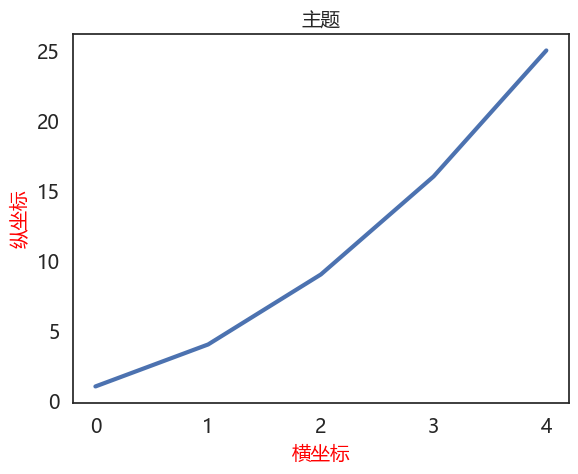

In [8]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc("font", family='Microsoft YaHei')

squares = [1, 4, 9, 16, 25]
fig, ax = plt.subplots()
ax.plot(squares, linewidth=3)
#设置图表标题并给坐标轴加上标签。
ax.set_title("主题", size=14)
ax.set_xlabel("横坐标", size=14, color='red')
ax.set_ylabel("纵坐标", size=14, color='red')

ax.tick_params(axis='both', labelsize=14)
plt.show()
